# Notebook 04: Results

In this notebook, let's summary the results of our experiments.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Recall we obtained the following scores from our best models for experiment on different architectures from **notebooks 00**, **01**, and **02**.

Although in **notebook 03**, we attempted transformer models for our multi-class classification task, we did not find a satisfying model. No attempt achieved an accuracy of $70\%$ on the training data. Thus, our customized transformer models will not be included here for comparison.

Recall in **notebook 03**, we have noted two possible causes for this:

1. Too many irrelevant dimensions for our encoded data. The encoded text has a dimension much larger than the 95-percentile sentence length of $55$ words. This large internal dimension of our models lead to slow convergence.

2. Not enough computation budget to train the transformer models. We have noted that to fine-tune a BERT encoder model for similar datasets requires extensive amount of computational resources, whereas we have a very limited budget here.

Let's move on to our final model comparison among the best models arcoss our experiments.

In [12]:
results = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "RandomForest_15 (baseline)": [76.10,75.48,76.10,75.31],
    "model_CNN_E1": [78.57, 78.27, 78.57, 78.24],
    "model_LSTM": [84.51, 84.96, 84.51, 84.19]
}

results_df = pd.DataFrame(results)
results_df.set_index("Metric", inplace=True)

results_df

,RandomForest_15 (baseline),model_CNN_E1,model_LSTM
Metric,,,
Accuracy,76.10,78.57,84.51
Precision,75.48,78.27,84.96
Recall,76.10,78.57,84.51
F1-score,75.31,78.24,84.19


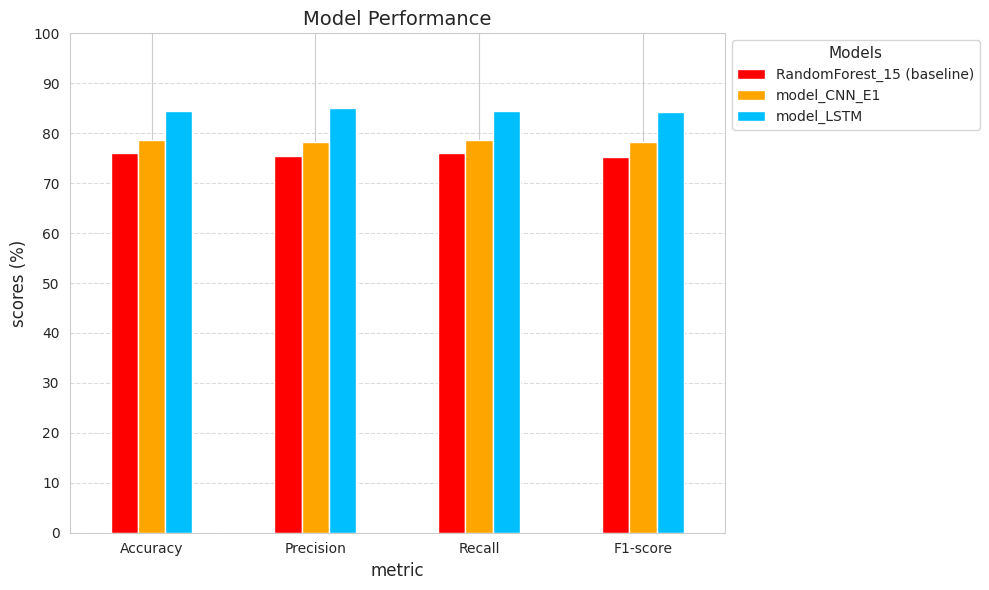

In [20]:
custom_colors = {
    "model_LSTM": "deepskyblue",
    "model_CNN_E1": "orange",
    "RandomForest_15 (baseline)": "red"
}


fig, ax = plt.subplots(figsize=(10, 6))
results_df.plot(kind="bar", ax=ax, color=[custom_colors[col] for col in results_df.columns])

ax.set_title("Model Performance", fontsize=14)
ax.set_xlabel("metric", fontsize=12)
ax.set_ylabel("scores (%)", fontsize=12)
ax.legend(title="Models", fontsize=10, title_fontsize=11, bbox_to_anchor=(1.0, 1.0))
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

So, our best model is `model_LSTM` from **notebook 02**, which has the best accuracy while all other scores are beyond $70\%$.